# Analysis and Visualization of Complex Agro-Environmental Data
---
### Exercise #7 - correction

In [30]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import numpy as np # for getting our distribution
import seaborn as sns # for plotting


In [31]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df = df.dropna() # remove all rows with missing data

#### 7.1 Check the if any of the continuous environmental variables in the EFIplus_medit dataset (Altitude, Actual_river_slope, Elevation_mean_catch, prec_ann_catch, temp_ann, temp_jan, temp_jul) would require a data transformation in order to apply parametric tests. 

In [32]:
# Subset the df by selecting the environmental variables and the species richness columns
df_env = df[["Altitude", "Actual_river_slope","Elevation_mean_catch", "prec_ann_catch","temp_ann","temp_jan","temp_jul"]]
df_env

,Altitude,Actual_river_slope,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul
18,1179,0.001,1687.103217,810.092422,9.3,1.4,18.4
19,1038,2.258,1293.238318,650.030528,10.4,2.2,19.6
28,636,0.263,967.398405,513.949149,12.6,3.8,21.3
32,890,2.909,1088.329483,553.756064,11.2,2.7,20.5
43,872,3.530,985.273741,518.863081,11.1,2.6,20.0
...,...,...,...,...,...,...,...
5006,80,17.700,535.776632,1274.106711,14.9,8.6,20.5
5007,150,0.010,552.966008,1226.616143,15.0,7.7,20.9
5008,140,3.059,552.966008,1226.616143,15.0,7.9,20.9
5009,450,62.100,850.789660,1480.433598,12.9,6.8,19.5


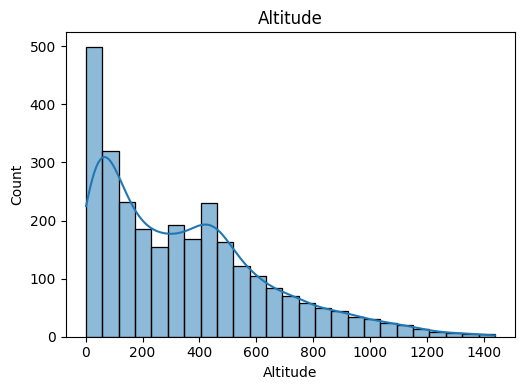

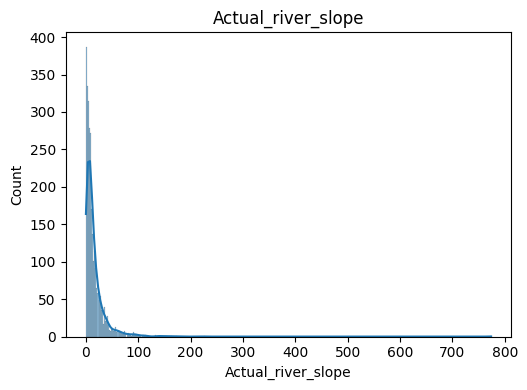

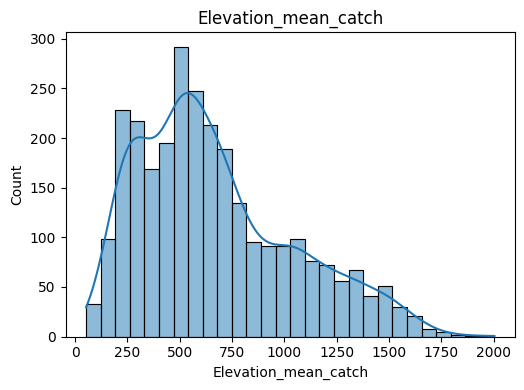

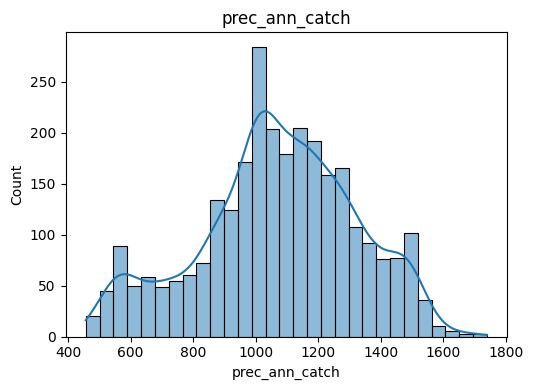

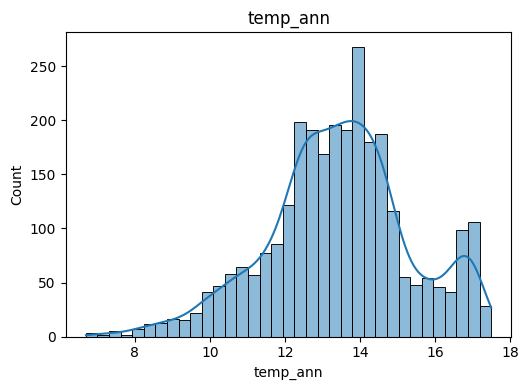

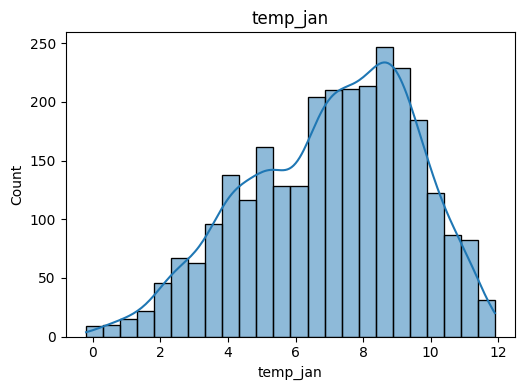

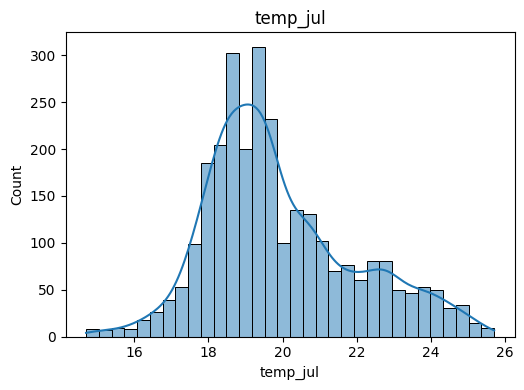

In [33]:
# Plot histogram for each environmental variable (replace by variable name)
for var in df_env:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True)
    plt.title(f'{var}')

    plt.tight_layout()
    plt.show()

#### 7.2 Apply the appropriate data transformation and check the new distributions.

C:\Users\psegurado\AppData\Local\Temp\ipykernel_320\3566139207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_env[['logActual_river_slope']] = np.log10(df_env[['Actual_river_slope']]+1)
C:\Users\psegurado\AppData\Local\Temp\ipykernel_320\3566139207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_env[['logAltitude']] = np.log10(df_env[['Altitude']]+1)


<Axes: xlabel='logAltitude', ylabel='Count'>

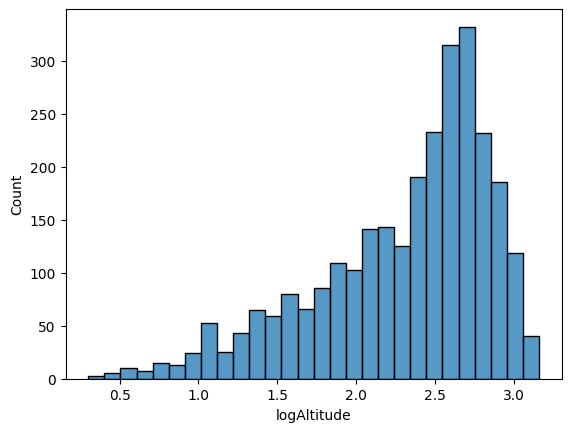

In [34]:
# Better to transform "Altitude" and "Actual_river_slope" (e.g. log(x+1) - need to add 1 because there are 0's) - RUN IT ONLY ONCE!!!
df_env[['logActual_river_slope']] = np.log10(df_env[['Actual_river_slope']]+1)
df_env[['logAltitude']] = np.log10(df_env[['Altitude']]+1)

sns.histplot(data=df_env[[:,"logAltitude"]])

<Axes: ylabel='Count'>

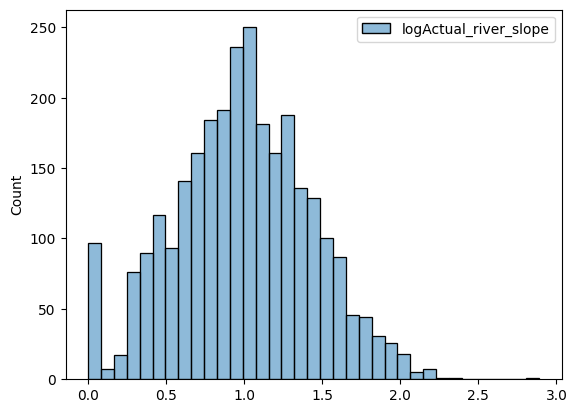

In [35]:
sns.histplot(data=df_env[["logActual_river_slope"]])

#### 7.3. Create a column with the total number of species present (species richness) in each sampling site.

In [36]:
# check the name of the first column of species names in the names list:
list(df)

['Site_code',
 'Latitude',
 'Longitude',
 'Country',
 'Catchment_name',
 'Galiza',
 'Subsample',
 'Calib_EFI_Medit',
 'Calib_connect',
 'Calib_hydrol',
 'Calib_morphol',
 'Calib_wqual',
 'Geomorph1',
 'Geomorph2',
 'Geomorph3',
 'Water_source_type',
 'Flow_regime',
 'Altitude',
 'Geological_typology',
 'Actual_river_slope',
 'Natural_sediment',
 'Elevation_mean_catch',
 'prec_ann_catch',
 'temp_ann',
 'temp_jan',
 'temp_jul',
 'Barriers_catchment_down',
 'Barriers_river_segment_up',
 'Barriers_river_segment_down',
 'Barriers_number_river_segment_up',
 'Barriers_number_river_segment_down',
 'Barriers_distance_river_segment_up',
 'Barriers_distance_river_segment_down',
 'Impoundment',
 'Hydropeaking',
 'Water_abstraction',
 'Hydro_mod',
 'Temperature_impact',
 'Velocity_increase',
 'Reservoir_flushing',
 'Sedimentation',
 'Channelisation',
 'Cross_sec',
 'Instream_habitat',
 'Riparian_vegetation',
 'Embankment',
 'Floodprotection',
 'Floodplain',
 'Toxic_substances',
 'Acidification',
 '

In [37]:
# Now check the index of the first species column
df.columns.get_loc("Abramis brama")

56

In [38]:
# The species columns goes from 56 to the last column - extract the name of the spceis columns
sp_pres = df.columns[56:]
sp_pres

Index(['Abramis brama', 'Achondrostoma arcasii', 'Achondrostoma occidentale',
       'Achondrostoma oligolepis', 'Acipenser naccarii',
       'Alburnoides bipunctatus', 'Alburnus albidus', 'Alburnus alburnus',
       'Alosa alosa', 'Alosa fallax',
       ...
       'Squalius malacitanus', 'Squalius pyrenaicus', 'Squalius torgalensis',
       'Thymallus thymallus', 'Tinca tinca', 'Zingel asper', 'Squalius sp',
       'Barbatula sp', 'Phoxinus sp', 'Iberochondrostoma_sp'],
      dtype='object', length=108)

In [39]:
# sum all the species presence/absence data into a new column named 'sp_rich'
df['sp_rich'] = df[sp_pres].sum(axis=1)

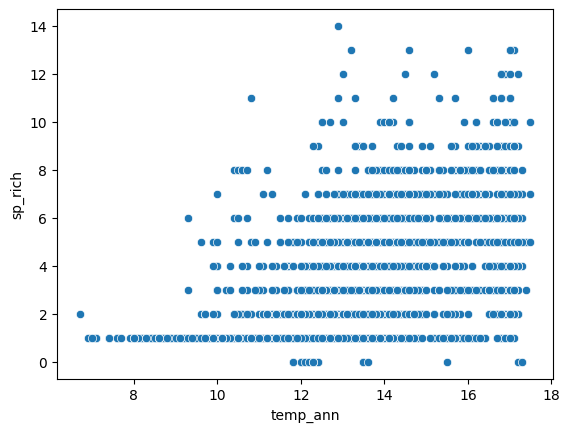

In [40]:
sns.scatterplot(data=df, x='temp_ann', y='sp_rich')
plt.show()

c:\Users\psegurado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


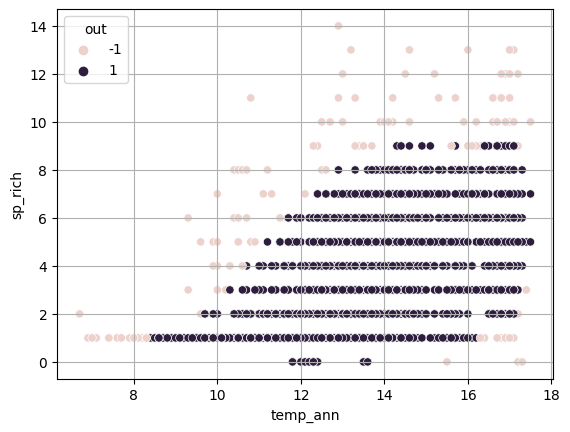

In [41]:
from sklearn.ensemble import IsolationForest

# Run a bivariate isolation forest to detect outliers
X = df[['temp_ann', 'sp_rich']]

# run the model
iso_forest = IsolationForest(contamination=0.05)
iso_forest.fit(X)

# Detect outliers
df['out'] = iso_forest.predict(X)
outliers = df[df['out'] == -1]

# plot
sns.scatterplot(data=df, x='temp_ann', y='sp_rich', hue='out')
plt.grid(True)
plt.show()